# Credit: Based on the Keras-TCN library/Repo examples

# We will use a forecasting example: A simple dataset

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tcn import TCN

In [5]:
milk = pd.read_csv('monthly-milk-production-pounds-p.csv', index_col=0, parse_dates=True)

In [6]:
print(milk.head())

            milk_production_pounds
month                             
1962-01-01                     589
1962-02-01                     561
1962-03-01                     640
1962-04-01                     656
1962-05-01                     727


In [7]:
lookback_window = 12  # months.

In [8]:
milk = milk.values  # just keep np array here for simplicity.

In [9]:
x, y = [], []
for i in range(lookback_window, len(milk)):
    x.append(milk[i - lookback_window:i])
    y.append(milk[i])
x = np.array(x)
y = np.array(y)

print(x.shape)
print(y.shape)

(156, 12, 1)
(156, 1)


# Create the TCN Model

In [13]:
model = Sequential([
    TCN(input_shape=(lookback_window, 1),
        kernel_size=3,
        nb_stacks=1,
        use_skip_connections=False,
        use_batch_norm=False,
        use_weight_norm=False,
        use_layer_norm=False
        ),
    Dense(1, activation='linear')
])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_1 (TCN)                  (None, 64)                136256    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 136,321
Trainable params: 136,321
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile('adam', 'mae')


In [18]:
print('Train...')
model.fit(x, y, epochs=200, verbose=0)

Train...


# Let us see the performance of the model

In [19]:
p = model.predict(x)

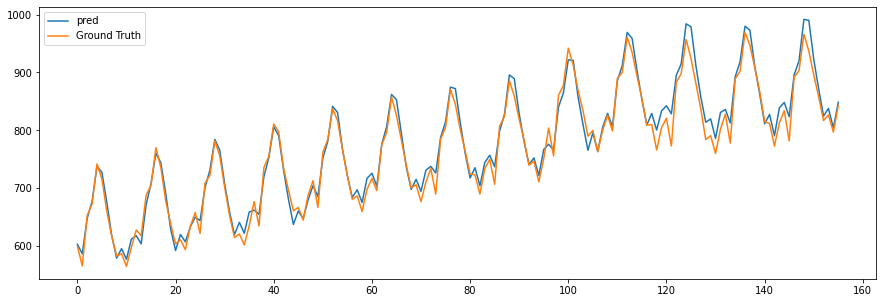

In [23]:
plt.figure(figsize=(15, 5))
plt.plot(p, label='pred')
plt.plot(y, label='Ground Truth')
plt.legend()
plt.show()